___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Trend Changes

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [5]:
from pandas.plotting import register_matplotlib_converters

In [6]:
register_matplotlib_converters()

In [3]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

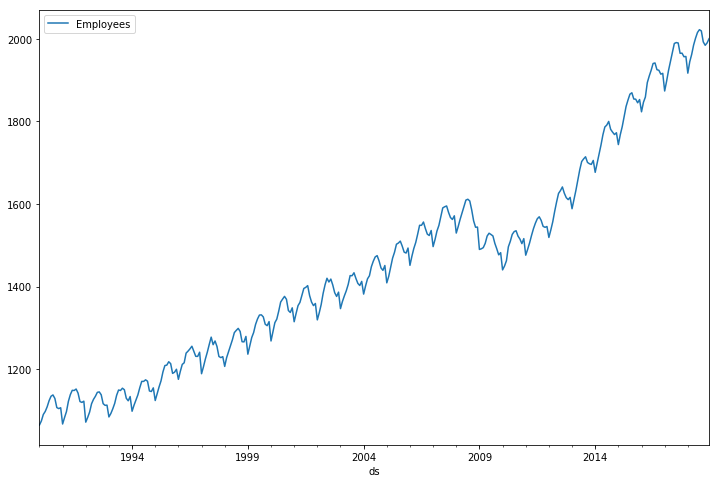

In [7]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [8]:
len(df)

348

In [9]:
len(df) - 12

336

In [10]:
train = df.iloc[:336]
test = df.iloc[336:]

In [11]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


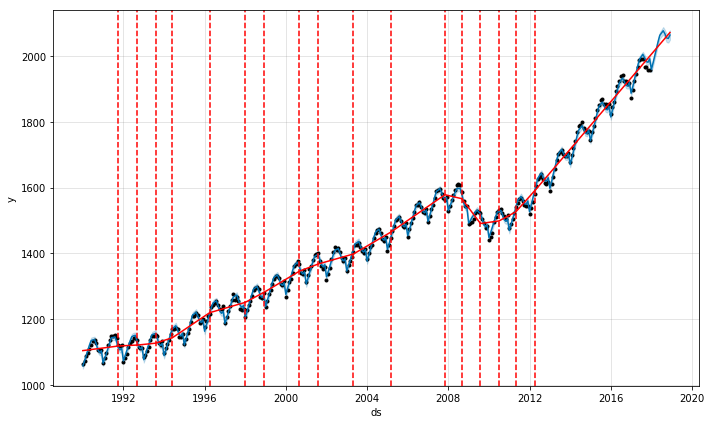

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)